# Importing the Dataset

Using Split Folder Command

In [ ]:
# Install for spliting folder
!pip install split-folders
!pip install split-folders tqdm

Importing Libraries

In [ ]:
import os
import shutil
import splitfolders
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras


import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Kaggle Import

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "rdxesss"
os.environ['KAGGLE_KEY'] = "bfcf5228e63f0b558e2353c5f5457733"


# !kaggle datasets download -d preetviradiya/covid19-radiography-dataset
!kaggle datasets download -d rdxesss/covid19-rd

# local_zip = '/content/covid19-radiography-dataset.zip'
local_zip = '/content/covid19-rd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

 96% 521M/541M [00:12<00:00, 25.2MB/s]
100% 541M/541M [00:12<00:00, 44.0MB/s]


In [ ]:
#4 class
# splitfolders.ratio('/content/COVID-19_Radiography_Dataset', output="/content/COVID-19_Radiography_Dataset/output_result", ratio=(.7, .2, .1))

Train Val Test Split

In [ ]:
#3 class
splitfolders.ratio('/content/COVID-19_Radiography_Dataset/', output="/content/COVID-19_Radiography_Dataset/output_result", ratio=(.7, .2, .1))

Copying files: 15153 files [00:04, 3709.41 files/s]


In [ ]:
# base_dir = '/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result'
base_dir = '/content/COVID-19_Radiography_Dataset/output_result'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
ViralPneumonia = os.path.join(base_dir,'Viral Pneumonia')
train_ViralPneumonia = os.path.join(train_dir, 'Viral Pneumonia')
val_ViralPneumonia = os.path.join(validation_dir, 'Viral Pneumonia')
test_ViralPneumonia = os.path.join(test_dir, 'Viral Pneumonia')

In [ ]:
Normal = os.path.join(base_dir,'Normal')
train_Normal = os.path.join(train_dir, 'Normal')
val_Normal = os.path.join(validation_dir, 'Normal')
test_Normal = os.path.join(test_dir, 'Normal')

In [ ]:
COVID = os.path.join(base_dir,'COVID')
train_COVID = os.path.join(train_dir, 'COVID')
val_COVID = os.path.join(validation_dir, 'COVID')
test_COVID = os.path.join(test_dir, 'COVID')

In [ ]:
# os.listdir('/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result/train')

os.listdir('/content/COVID-19_Radiography_Dataset/output_result/train')

['Viral Pneumonia', 'Normal', 'COVID']

In [ ]:
# os.listdir('/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result/val')

os.listdir('/content/COVID-19_Radiography_Dataset/output_result/val')

['Viral Pneumonia', 'Normal', 'COVID']

In [ ]:
# os.listdir('/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result/test')

os.listdir('/content/COVID-19_Radiography_Dataset/output_result/test')

['Viral Pneumonia', 'Normal', 'COVID']

In [ ]:
train_clean_dir = os.path.join(train_dir, 'Viral Pneumonia')
train_clean_dir = os.path.join(train_dir, 'Normal')
train_clean_dir = os.path.join(train_dir, 'COVID')

In [ ]:
validation_clean_dir = os.path.join(validation_dir, 'Viral Pneumonia')
validation_clean_dir = os.path.join(validation_dir, 'Normal')
validation_clean_dir = os.path.join(validation_dir, 'COVID')

In [ ]:
test_clean_dir = os.path.join(train_dir, 'Viral Pneumonia')
test_clean_dir = os.path.join(train_dir, 'Normal')
test_clean_dir = os.path.join(train_dir, 'COVID')

Data Augmentation

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(240, 240),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20,
        class_mode='categorical',
        shuffle=True
    ) 
 
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(240, 240), 
        batch_size=20, 
        class_mode='categorical',
        shuffle=True
    )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(240, 240), 
        batch_size=20, 
        class_mode='categorical',
        shuffle=True
    )

Found 10606 images belonging to 3 classes.
Found 3030 images belonging to 3 classes.
Found 1517 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
validation_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
test_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

# Inception Resnet V2

In [ ]:
base_model = keras.applications.InceptionResNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

219070464/219055592 [==============================] - 3s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/InceptionResnetV2/InceptionResnetV2.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/InceptionResnetV2.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
531/531 [==============================] - 268s 425ms/step - loss: 0.4085 - categorical_accuracy: 0.8352 - val_loss: 0.3035 - val_categorical_accuracy: 0.8850
Epoch 2/10
531/531 [==============================] - 217s 409ms/step - loss: 0.3231 - categorical_accuracy: 0.8747 - val_loss: 0.2109 - val_categorical_accuracy: 0.9150
Epoch 3/10
531/531 [==============================] - 215s 405ms/step - loss: 0.2952 - categorical_accuracy: 0.8875 - val_loss: 0.2974 - val_categorical_accuracy: 0.8900
Epoch 4/10
531/531 [==============================] - 219s 411ms/step - loss: 0.2898 - categorical_accuracy: 0.8908 - val_loss: 0.3206 - val_categorical_accuracy: 0.8800
Epoch 5/10
531/531 [==============================] - 219s 412ms/step - loss: 0.2826 - categorical_accuracy: 0.8930 - val_loss: 0.2917 - val_categorical_accuracy: 0.9050
Epoch 6/10
531/531 [==============================] - 219s 412ms/step - loss: 0.2720 - categorical_accuracy: 0.8941 - val_loss: 0.2626 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.23606126010417938, 0.9078823328018188]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.24019911885261536, 0.905940592288971]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 26s 342ms/step - loss: 0.2744 - categorical_accuracy: 0.8972


[0.2744252383708954, 0.8971654772758484]

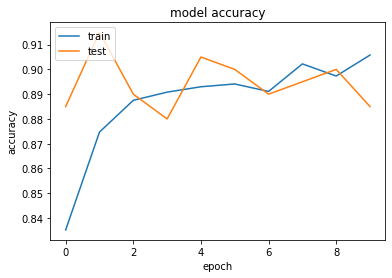

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

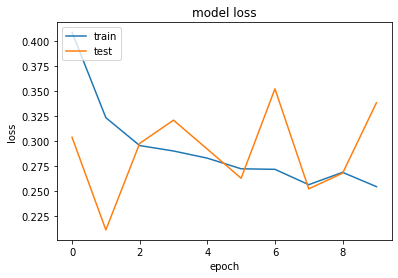

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


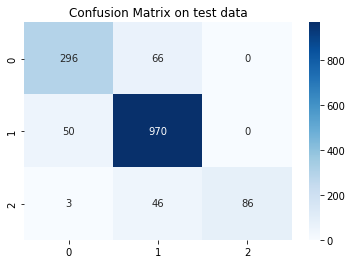

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       362
           1       0.90      0.95      0.92      1020
           2       1.00      0.64      0.78       135

    accuracy                           0.89      1517
   macro avg       0.91      0.80      0.84      1517
weighted avg       0.89      0.89      0.89      1517



# Densenet 121

In [ ]:
base_model = keras.applications.DenseNet121(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/DenseNet121/DenseNet121.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/DenseNet121.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
531/531 [==============================] - 196s 352ms/step - loss: 0.4123 - categorical_accuracy: 0.8403 - val_loss: 0.2623 - val_categorical_accuracy: 0.8750
Epoch 2/10
531/531 [==============================] - 183s 344ms/step - loss: 0.3145 - categorical_accuracy: 0.8820 - val_loss: 0.2542 - val_categorical_accuracy: 0.8850
Epoch 3/10
531/531 [==============================] - 185s 348ms/step - loss: 0.2957 - categorical_accuracy: 0.8893 - val_loss: 0.2622 - val_categorical_accuracy: 0.8900
Epoch 4/10
531/531 [==============================] - 185s 348ms/step - loss: 0.2764 - categorical_accuracy: 0.8984 - val_loss: 0.2987 - val_categorical_accuracy: 0.8900
Epoch 5/10
531/531 [==============================] - 195s 366ms/step - loss: 0.2653 - categorical_accuracy: 0.8985 - val_loss: 0.2060 - val_categorical_accuracy: 0.9100
Epoch 6/10
531/531 [==============================] - 183s 345ms/step - loss: 0.2598 - categorical_accuracy: 0.9024 - val_loss: 0.2770 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.23107516765594482, 0.9127852320671082]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2364470511674881, 0.909900963306427]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 19s 221ms/step - loss: 0.2481 - categorical_accuracy: 0.8965


[0.24812887609004974, 0.8965062499046326]

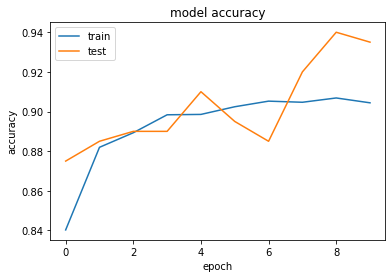

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

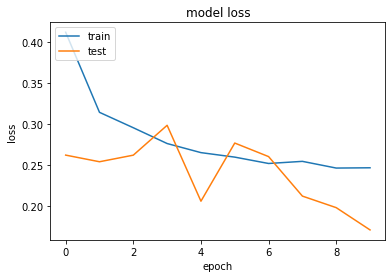

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


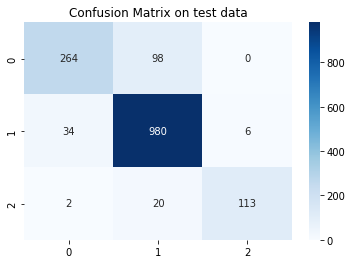

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       362
           1       0.89      0.96      0.93      1020
           2       0.95      0.84      0.89       135

    accuracy                           0.89      1517
   macro avg       0.91      0.84      0.87      1517
weighted avg       0.89      0.89      0.89      1517



# InceptionV3

In [ ]:
base_model = keras.applications.InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/InceptionV3/InceptionV3.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/InceptionV3.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
531/531 [==============================] - 189s 344ms/step - loss: 0.4118 - categorical_accuracy: 0.8354 - val_loss: 0.3601 - val_categorical_accuracy: 0.8550
Epoch 2/10
531/531 [==============================] - 181s 341ms/step - loss: 0.3128 - categorical_accuracy: 0.8754 - val_loss: 0.2411 - val_categorical_accuracy: 0.9100
Epoch 3/10
531/531 [==============================] - 181s 341ms/step - loss: 0.2937 - categorical_accuracy: 0.8886 - val_loss: 0.4250 - val_categorical_accuracy: 0.8550
Epoch 4/10
531/531 [==============================] - 181s 342ms/step - loss: 0.2863 - categorical_accuracy: 0.8888 - val_loss: 0.2209 - val_categorical_accuracy: 0.9200
Epoch 5/10
531/531 [==============================] - 180s 339ms/step - loss: 0.2648 - categorical_accuracy: 0.8991 - val_loss: 0.2454 - val_categorical_accuracy: 0.9150
Epoch 6/10
531/531 [==============================] - 182s 342ms/step - loss: 0.2558 - categorical_accuracy: 0.9003 - val_loss: 0.2040 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.22567445039749146, 0.914105236530304]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.23409654200077057, 0.909900963306427]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 13s 164ms/step - loss: 0.3553 - categorical_accuracy: 0.8642


[0.35532474517822266, 0.8642056584358215]

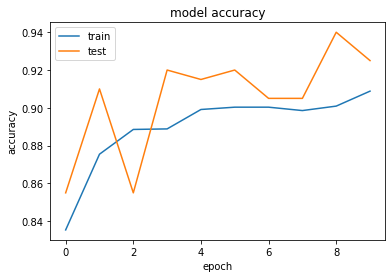

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

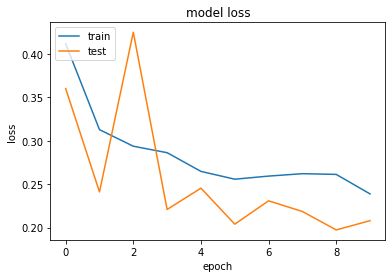

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


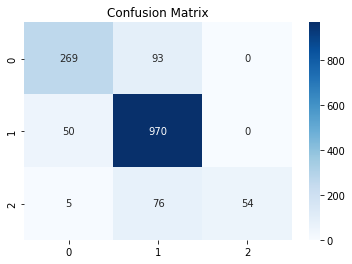

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       362
           1       0.85      0.95      0.90      1020
           2       1.00      0.40      0.57       135

    accuracy                           0.85      1517
   macro avg       0.89      0.70      0.75      1517
weighted avg       0.86      0.85      0.84      1517



# VGG16

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/VGG16/VGG16.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/VGG16.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
531/531 [==============================] - 209s 377ms/step - loss: 0.6583 - categorical_accuracy: 0.7121 - val_loss: 0.5842 - val_categorical_accuracy: 0.7500
Epoch 2/10
531/531 [==============================] - 198s 372ms/step - loss: 0.5436 - categorical_accuracy: 0.7632 - val_loss: 0.4772 - val_categorical_accuracy: 0.8300
Epoch 3/10
531/531 [==============================] - 199s 374ms/step - loss: 0.4922 - categorical_accuracy: 0.7955 - val_loss: 0.4594 - val_categorical_accuracy: 0.8400
Epoch 4/10
531/531 [==============================] - 202s 381ms/step - loss: 0.4621 - categorical_accuracy: 0.8099 - val_loss: 0.4747 - val_categorical_accuracy: 0.8050
Epoch 5/10
531/531 [==============================] - 198s 373ms/step - loss: 0.4392 - categorical_accuracy: 0.8269 - val_loss: 0.4480 - val_categorical_accuracy: 0.8050
Epoch 6/10
531/531 [==============================] - 203s 383ms/step - loss: 0.4205 - categorical_accuracy: 0.8347 - val_loss: 0.3434 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.37125247716903687, 0.8590420484542847]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.36701592803001404, 0.8554455637931824]

In [ ]:
model.evaluate(test_generator)

76/76 [==============================] - 34s 350ms/step - loss: 0.4153 - categorical_accuracy: 0.8240


[0.4153132140636444, 0.8239947557449341]

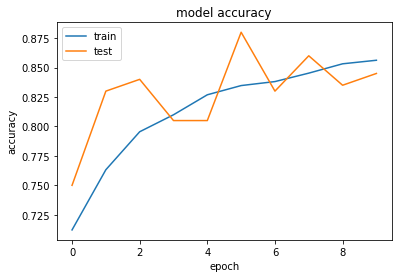

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

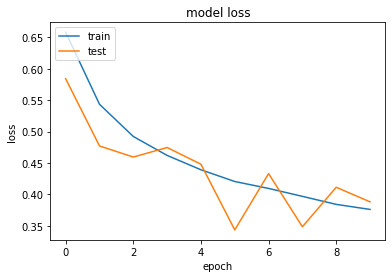

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


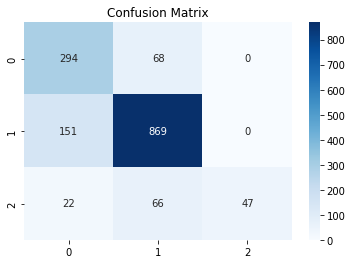

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       362
           1       0.87      0.85      0.86      1020
           2       1.00      0.35      0.52       135

    accuracy                           0.80      1517
   macro avg       0.83      0.67      0.69      1517
weighted avg       0.82      0.80      0.79      1517



# VGG19

In [ ]:
base_model = keras.applications.VGG19(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(240, 240, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(240, 240, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint


# # Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbackss = [
    ModelCheckpoint('/content/drive/MyDrive/Classification/Radiography database/Models/VGG19/VGG19.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max'),
#     ReduceLROnPlateau(monitor='val_Dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
#     EarlyStopping(monitor='val_Dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    CSVLogger('/content/drive/MyDrive/Classification/Radiography database/CSV/VGG19.csv',  separator=",")
]

In [ ]:
from keras.callbacks import History
history = History()


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.fit_generator(train_generator,
      epochs=10,callbacks=[history, callbackss],
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
332/332 [==============================] - 215s 612ms/step - loss: 0.7203 - categorical_accuracy: 0.6896 - val_loss: 0.6410 - val_categorical_accuracy: 0.7031
Epoch 2/10
332/332 [==============================] - 193s 580ms/step - loss: 0.6244 - categorical_accuracy: 0.7129 - val_loss: 0.6126 - val_categorical_accuracy: 0.7375
Epoch 3/10
332/332 [==============================] - 193s 581ms/step - loss: 0.5871 - categorical_accuracy: 0.7281 - val_loss: 0.5888 - val_categorical_accuracy: 0.7406
Epoch 4/10
332/332 [==============================] - 194s 584ms/step - loss: 0.5539 - categorical_accuracy: 0.7467 - val_loss: 0.5527 - val_categorical_accuracy: 0.7281
Epoch 5/10
332/332 [==============================] - 195s 585ms/step - loss: 0.5314 - categorical_accuracy: 0.7632 - val_loss: 0.5319 - val_categorical_accuracy: 0.7625
Epoch 6/10
332/332 [==============================] - 195s 586ms/step - loss: 0.5197 - categorical_accuracy: 0.7739 - val_loss: 0.5106 - val_categoric

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.46735328435897827, 0.8067131638526917]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.471310019493103, 0.800990104675293]

In [ ]:
model.evaluate(test_generator)

48/48 [==============================] - 20s 426ms/step - loss: 0.4729 - categorical_accuracy: 0.7943


[0.4729199707508087, 0.794330894947052]

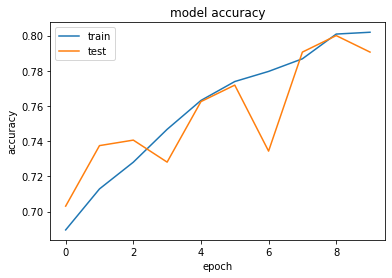

In [ ]:
#plooting the results

import matplotlib.pyplot as plt

#summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

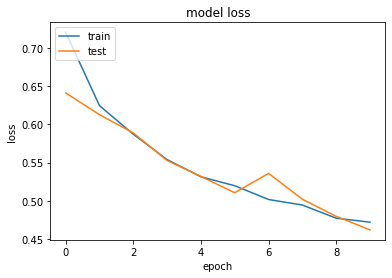

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 1517 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


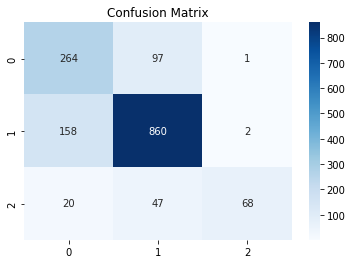

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    class_mode='categorical',
   #seed = 42,
    batch_size = 20, 
    shuffle = False,
    # subset = 'validation'
)

# Obtain predictions
pred = model.predict_generator(test_generator) # Gives class probabilities
pred = np.round(pred) # Gives one-hot encoded classes
pred = np.argmax(pred, axis = 1) # Gives class labels

# Obtain actual labels
actual = test_generator.classes
    
# Now plot matrix
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(
    cm, 
    cmap="Blues",
    annot = True, 
    fmt = "d"
)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       362
           1       0.86      0.84      0.85      1020
           2       0.96      0.50      0.66       135

    accuracy                           0.79      1517
   macro avg       0.80      0.69      0.72      1517
weighted avg       0.80      0.79      0.79      1517

